# View wind speed data

In [13]:
import os


current_directory = os.getcwd()
if current_directory.endswith('notebooks'):
    os.chdir('..')

In [29]:
import httpx
import xarray as xr
import pydap
import scipy
import zarr
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

In [19]:
from sherlock_wind.example import example_stac_item
from sherlock_wind.storage import move_file

## Process wind speed using Sherlock Wind

In [16]:
url = "http://localhost:8080/item"

In [17]:
response = httpx.post(url, json=example_stac_item, timeout=None)
response

<Response [200 OK]>

In [18]:
result = response.json()
result

{'uri': 'gs://spill-sight-public/sherlock_wind/S1A_IW_GRDH_1SDV_20190811T212221_20190811T212246_028527_0339B5_B0AF.nc',
 'url': 'https://storage.cloud.google.com/spill-sight-public/sherlock_wind/S1A_IW_GRDH_1SDV_20190811T212221_20190811T212246_028527_0339B5_B0AF.nc'}

In [22]:
local_path = "./data.nc"
move_file(result["uri"], local_path)

INFO:google.resumable_media._helpers:No MD5 checksum was returned from the service while downloading https://storage.googleapis.com/download/storage/v1/b/spill-sight-public/o/sherlock_wind%2FS1A_IW_GRDH_1SDV_20190811T212221_20190811T212246_028527_0339B5_B0AF.nc?generation=1614346471386577&alt=media
(which happens for composite objects), so client-side content integrity
checking is not being performed.


## Load data with xarray

In [23]:
data = xr.open_dataset(local_path)

In [24]:
data

<xarray.Dataset>
Dimensions:    (latitude: 8, longitude: 31, time: 1)
Coordinates:
  * longitude  (longitude) float32 -139.2 -139.0 -138.7 ... -132.2 -132.0 -131.7
  * latitude   (latitude) float32 70.61 70.36 70.11 69.86 ... 69.36 69.11 68.86
  * time       (time) datetime64[ns] 2019-08-11T21:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-02-26 11:38:22 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

## View wind speed data

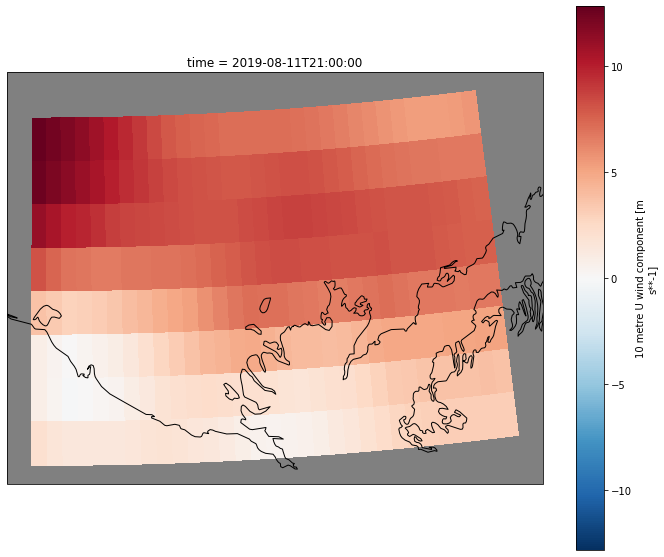

In [45]:
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection=ccrs.Orthographic(data.longitude[0].item(), data.latitude[0].item()), facecolor="gray"))

array = data.u10

plot = array.isel(time=0).plot(transform=ccrs.PlateCarree(),ax=ax)

plot.axes.coastlines()